# Analysis of Movie Ratings

**This is a very simple analysis with the objective of finding the average ratings of movies by genre. The dataset available on the location described below**


* Data Source: MovieLens web site (filename: ml-20m.zip)
* Location: https://grouplens.org/datasets/movielens/


In [1]:
!ls ./movielens

genome-tags.csv  links.csv  movies.csv	ratings.csv  README.txt  tags.csv


In [2]:
#about the dataset
!cat ./movielens/README.txt

Summary

This dataset (ml-20m) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on March 31, 2015, and updated on October 17, 2016 to update links.csv and add genome-* files.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in six files, `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.


Usage License

Neither the Universi

In [3]:
!head ./movielens/movies.csv

In [4]:
!head ./movielens/ratings.csv

### csv files in the dataset
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* 

In [5]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# movies DataFrame

movies = pd.read_csv('./movielens/movies.csv')
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [7]:
# ratings DataFrame

ratings = pd.read_csv('./movielens/ratings.csv')
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [8]:
# For this analysis we can delete the timestamps

del ratings['timestamp']

In [9]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [10]:
print("max rating is:", ratings['rating'].max(), " and min rating is", ratings['rating'].min())

max rating is: 5.0  and min rating is 0.5


In [11]:
# mean and standard deviation
print("mean is:", ratings['rating'].mean())
print("std is:", ratings['rating'].std())

mean is: 3.5255285642993797
std is: 1.051988919275684


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe540adc6d8>]],
      dtype=object)

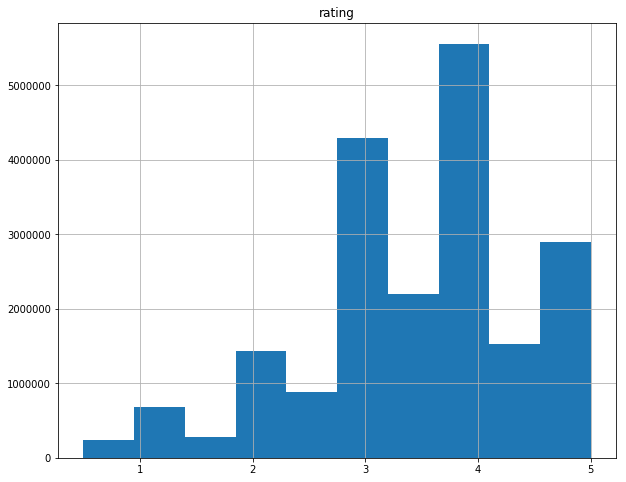

In [12]:
%matplotlib inline

ratings.hist(column='rating', figsize=(10, 8))

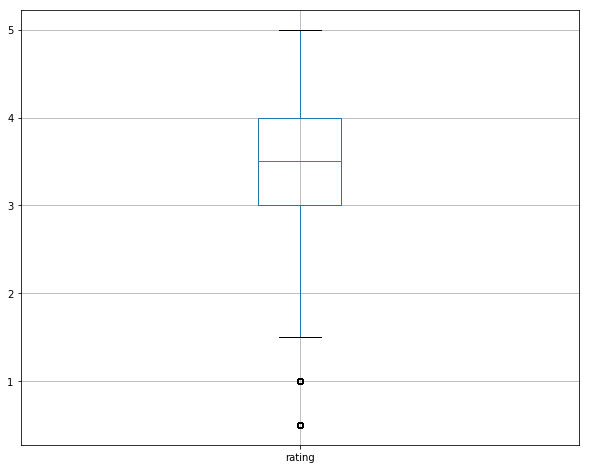

In [13]:
ratings.boxplot(column='rating', figsize=(10, 8))

### Checking if it is necessary to clean the data

In [14]:
# shapes of the Data Frames

print(movies.shape)
print(ratings.shape)

(27278, 3)
(20000263, 3)


In [15]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [16]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

## Analysis of ratings by genre

In [17]:
# Group every rating with its mean value for each movieID

avg_ratings = ratings[['movieId','rating']].groupby('movieId').mean()

In [18]:
# movies_and_ratings is the merged data frame containing the average rating per movie

movies_and_ratings = pd.merge(movies, avg_ratings, right_index=True, left_on='movieId', how='inner')

In [19]:
movies_and_ratings.head(5)

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [20]:
movies_and_ratings.isnull().any()

movieId    False
title      False
genres     False
rating     False
dtype: bool

It may also be important to append the number of ratings that a movie received. A movie with just 1 rating is not a reliable data

In [21]:
ratings_count = ratings[['movieId','rating']].groupby('movieId').count()

# Change column name from rating to # of ratings
ratings_count.columns = ['# of ratings']

In [22]:
# Append the number of ratings in the movies_and_ratings Data Frame

movies_and_ratings = pd.merge(movies_and_ratings, ratings_count, right_index=True, left_on='movieId', how='inner')

In [23]:
print(movies_and_ratings.shape)
movies_and_ratings.head(5)

(26744, 5)


,movieId,title,genres,rating,# of ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756
4,5,Father of the Bride Part II (1995),Comedy,3.064592,12161


Now, let's eliminate all the movies with a sample size of ratings lower than 100.

In [24]:
mask = movies_and_ratings['# of ratings'] > 100

movies_and_ratings = movies_and_ratings[mask]
print(movies_and_ratings.shape)

(8532, 5)


In [25]:
# delete # of ratings column. It is no longer necessary.

del movies_and_ratings['# of ratings']

There are many movies that fit more than one genre.

In [26]:
genres = movies['genres'].unique().tolist()
genres

['Adventure|Animation|Children|Comedy|Fantasy',
 'Adventure|Children|Fantasy',
 'Comedy|Romance',
 'Comedy|Drama|Romance',
 'Comedy',
 'Action|Crime|Thriller',
 'Adventure|Children',
 'Action',
 'Action|Adventure|Thriller',
 'Comedy|Horror',
 'Adventure|Animation|Children',
 'Drama',
 'Action|Adventure|Romance',
 'Crime|Drama',
 'Drama|Romance',
 'Action|Comedy|Crime|Drama|Thriller',
 'Comedy|Crime|Thriller',
 'Crime|Drama|Horror|Mystery|Thriller',
 'Drama|Sci-Fi',
 'Children|Drama',
 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
 'Mystery|Sci-Fi|Thriller',
 'Adventure|Romance|IMAX',
 'Documentary|IMAX',
 'Children|Comedy',
 'Drama|War',
 'Action|Crime|Drama',
 'Action|Adventure|Fantasy',
 'Comedy|Drama|Thriller',
 'Mystery|Thriller',
 'Animation|Children|Drama|Musical|Romance',
 'Crime|Mystery|Thriller',
 'Action|Drama|Thriller',
 'Adventure|Drama',
 'Drama|Mystery',
 'Drama|Thriller',
 'Comedy|Crime',
 'Action|Sci-Fi|Thriller',
 'Action|Comedy|Horror|Thriller',
 'Comedy|Drama',
 'Documen

In [27]:
#create a list of unique genres
g = []
for x in genres:
    y = x.split('|')
    for z in y:
        if z in g:
            pass
        else:
            g.append(z)
print(g)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']


In [28]:
# We can eliminate both '(no genres listed)' and 'IMAX' because those genres don't make much sense

g.remove('(no genres listed)')
g.remove('IMAX')

In [29]:
# Create a dictionary where the key is a genre and the value is the average rating of this genre

d = {}
for genre in g:
    data = movies_and_ratings[movies_and_ratings['genres'].str.contains(genre)]
    d[genre] = data['rating'].mean()

In [30]:
# Sort the dictionary into a list of keys and a list of values matching the indexes

sorted_d = sorted(d.items(), key=lambda x: x[1])
genres = []
ratin = []
for e in sorted_d:
    genres.append(e[0])
    ratin.append(e[1])

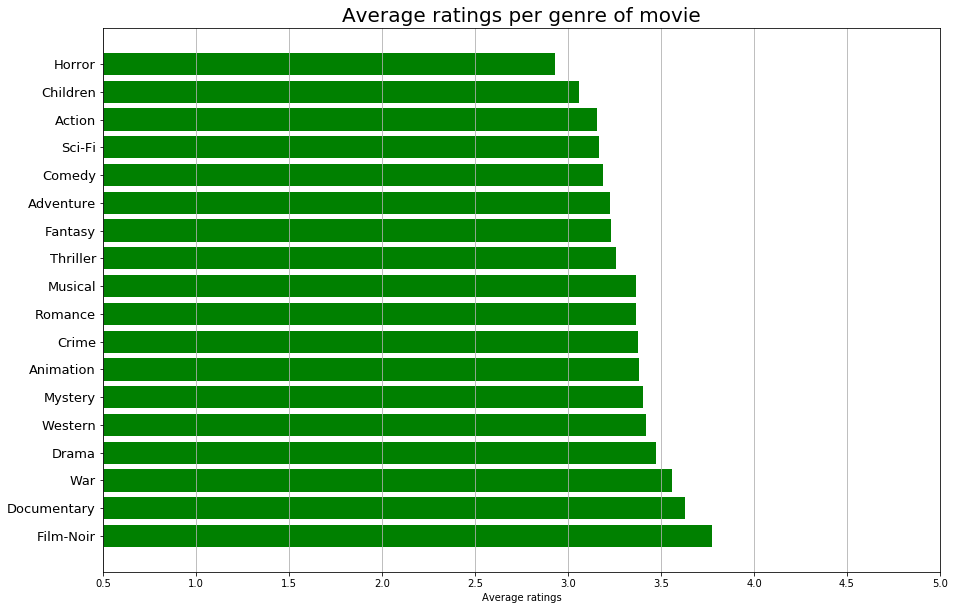

In [31]:
# Plot a bar chart

fig1, ax1 = plt.subplots(figsize=(15, 10))

y_pos = np.arange(len(genres))
X = np.array(ratin)       # average ratings per genre

ax1.barh(y_pos, X, align='center', color='green')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(genres, fontsize=13)
ax1.invert_yaxis()               # labels read top-to-bottom
ax1.set_xlabel('Average ratings')
ax1.set_title('Average ratings per genre of movie', fontsize=20)
ax1.set_xlim([0.5, 5.0])
plt.grid(axis='x')

#### In the analysis we found that Film-Noir is the movie genre with the hightes average rating, but how many movies from that dataset have that genre?

In [32]:
np.count_nonzero(movies_and_ratings['genres'].str.contains('Film-Noir'))

102

#### That are 102 Film-Noir movies rated more than 100 times

Let's plot a box plot graph for the 4 genres with hightes average ratings, in other words, for **Drama, War, Documentary** and **Film-Noir** 

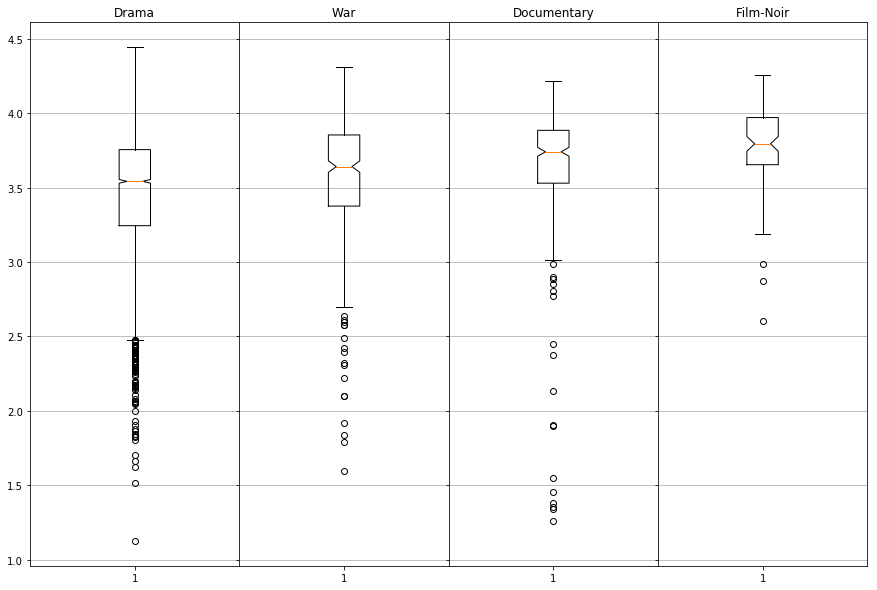

In [33]:
fig2, ax2 = plt.subplots(1,4, figsize=(15, 10), sharex=True, sharey=True)

i = 0
for g in genres[-4:]:
    mask = movies_and_ratings['genres'].str.contains(g)
    t = movies_and_ratings[mask]
    ax2[i].boxplot(t['rating'], notch=True)
    ax2[i].set_title(g)
    ax2[i].grid(axis='y')
    i += 1
plt.subplots_adjust(wspace=0, hspace=0)

    

What is interesting to notice in that analysis is that Film-Noir movies are more reliable than the other 3 genres. There are only 3 outliers and the lowest rating movie is above 2.5. In other words, if you are afraid of downloading/watching a bad movie, watch a Film-noir and you will probably be satisfied.